Lambda School Data Science

*Unit 1, Sprint 3, Module 2*

---

# SAMPLING CONFIDENCE INTERVALS AND HYPOTHESIS TESTING ASSIGNMENT

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):




In [0]:
# import pandas library.
import pandas as pd
# import numpy as np.
import numpy as np

In [0]:
# label and read the data file, set the '?'s to NaNs, 'header=None' to adjust the data frame.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', na_values='?', header=None,)
# rename the column headers.                
df.columns = df.columns=['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']
# show the shape of the data frame.
print(df.shape)
# show the data frame with headers.
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
# replace values for the 'n' with 0, 'y' with 1, 'democrat' with 1, 'republican' with 2.
df = df.replace({'n':0, 'y':1, 'republican':2, 'democrat':1})
# show the data frame with headers.
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# create a democratic 'dem' data frame.
dem = df[df.party == 1]
# create a republican 'rep' data frame.
rep = df[df.party == 2]

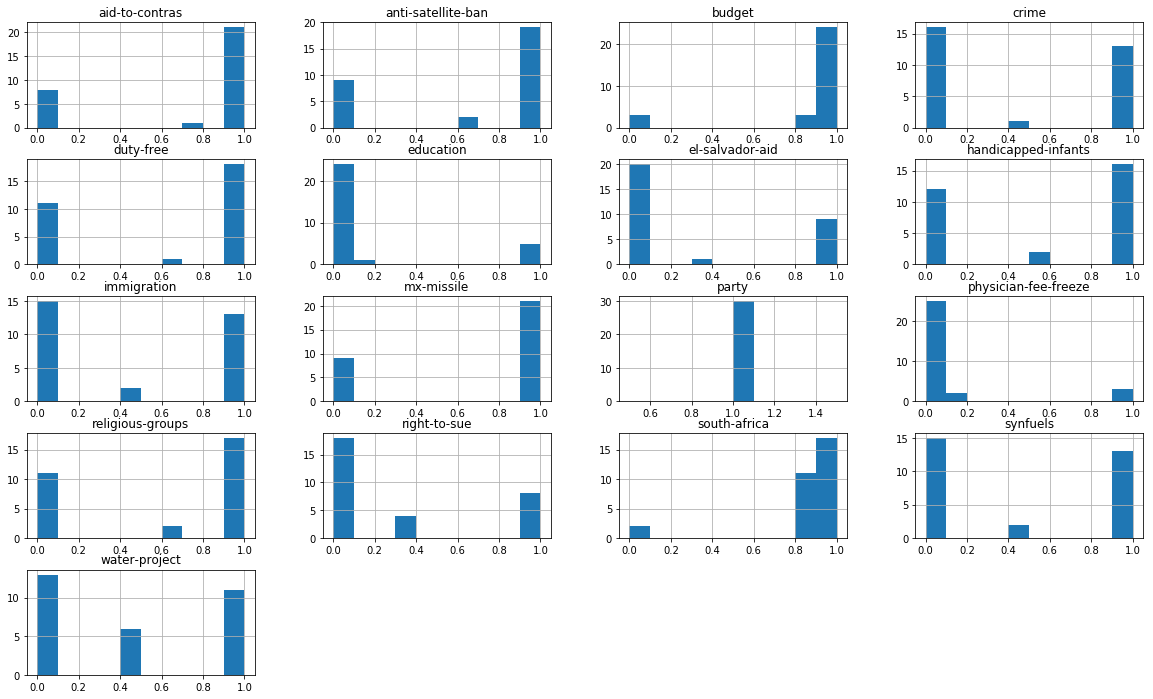

In [0]:
# create a sample set of data '30'.
sample = dem.sample(30)
sample_mean = sample.mean()
# fill NA's with the 'mean'.
sample = sample.fillna(sample_mean)
# show sample in a histrogram.
sample.hist(figsize=(20,12));

In [0]:
# show the sample data frame.
sample

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
292,1,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000
78,1,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000
96,1,0.000000,0.000000,0.888889,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
297,1,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.307692,0.000000,1.00000,0.894737
181,1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000
414,1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
329,1,1.000000,0.458333,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.894737
90,1,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000
205,1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000
104,1,0.571429,0.458333,0.888889,0.107143,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.464286,0.000000,1.000000,1.000000,0.00000,0.894737



### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?


In [0]:
# set the 'sample for just the 'testing_feature'
sample = sample['immigration']
# show the 'sample1_feature' data with text & 'testing_feature'.
print('Sample', sample)

Sample 292    1.000000
78     1.000000
96     0.000000
297    1.000000
181    1.000000
414    0.000000
329    1.000000
90     1.000000
205    1.000000
104    1.000000
200    0.000000
397    0.000000
316    0.000000
174    0.000000
372    0.000000
110    1.000000
183    0.464286
6      0.000000
168    0.000000
387    0.000000
112    1.000000
423    0.000000
221    0.000000
23     0.000000
254    1.000000
101    0.000000
170    0.464286
114    0.000000
91     1.000000
362    1.000000
Name: immigration, dtype: float64


In [0]:
# create the 'mean'.
sample_mean = sample.mean()
# show the results.
print('Mean:', sample_mean)

Mean: 0.46428571428571425


In [0]:
# create the 'standard deviation' for 'sample1'.
sample_std_dev = np.std(sample)
# create the 'size' for 'sample1'.
sample_size = len(sample)
# create the 'standard error' for 'sample1'.
sample_std_error = sample_std_dev/np.sqrt(sample_size)
# show the results.
print('Standard Deviation:', sample_std_dev)
print('Size:', sample_size)
print('Standard Error:', sample_std_error)

Standard Deviation: 0.48181205582971576
Size: 30
Standard Error: 0.0879664438186246


In [0]:
# import scipy.stats library.
import scipy.stats as stats

In [0]:
# create the 't statistic' for 'sample1_feature_size'.
t = stats.t.ppf(0.975, sample_size-1)
# create the 'confidence interval'for the 'sample1_feature' data.
sample_ci = stats.t.interval(0.95, 99, loc=np.mean(sample_mean), scale=sample_std_error)
# show the 't statistic' & 'confidence interval' with text.
print('T Statistic:', t)
print('95% Confidence Interval:', sample_ci)

T Statistic: 2.045229642132703
95% Confidence Interval: (0.2897412052968631, 0.6388302232745654)


In [0]:
# import seaborn, matplotlib libraries.
import seaborn as sns
import matplotlib.pyplot as plt 

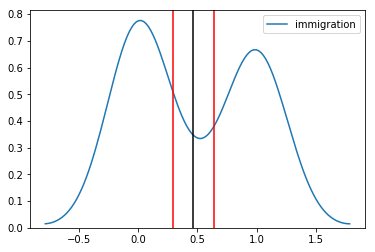

In [0]:
# show kdeplot graph.
sns.kdeplot(sample);
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=sample_ci[0], color='r')
plt.axvline(x=sample_ci[1], color='r')

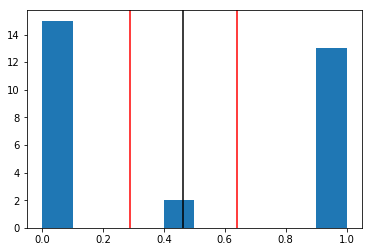

In [0]:
# show histogram graph.
plt.hist(sample)
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=sample_ci[0], color='r')
plt.axvline(x=sample_ci[1], color='r')

In [0]:
# import scipy.stats 't', 'ttest_1samp' features.
from scipy.stats import t, ttest_1samp

In [0]:
# t-test 1 sample.
ttest_1samp(sample_mean, 0.30477)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_1sampResult(statistic=nan, pvalue=nan)

•
### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# import numpy, chisquare from scipy.stats.
import numpy as np
from scipy.stats import chisquare
# show chisquare results for 'sample'.
print(chisquare(sample, axis=None))

Power_divergenceResult(statistic=14.999999999999998, pvalue=0.9850149521878717)


In [0]:
# show the value counts for 'party'.
df['party'].value_counts()

1    267
2    168
Name: party, dtype: int64

In [0]:
# show the value counts for 'immigration'.
df['immigration'].value_counts()
df

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [0]:
# drop the NA's in the 'immigration' column.
df1 = df['immigration'].dropna()
df.sort_values(by='immigration')
# crosstab with 'party' & 'immigration'.
cont_table = pd.crosstab(df['party'], df['immigration'], margins=True)
# show the results.
cont_table

immigration,0.0,1.0,All
party,,,
1,139,124,263
2,73,92,165
All,212,216,428


In [0]:
# show the data frame.
df1

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     1.0
14     0.0
15     1.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     1.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
404    1.0
405    0.0
406    1.0
407    0.0
408    0.0
409    0.0
410    0.0
411    1.0
412    1.0
413    1.0
414    0.0
415    1.0
416    1.0
417    1.0
418    1.0
419    0.0
420    1.0
421    0.0
422    0.0
423    0.0
424    1.0
425    1.0
426    1.0
427    1.0
428    1.0
429    1.0
430    1.0
431    1.0
432    0.0
434    1.0
Name: immigration, Length: 428, dtype: float64

### Excpected Value Count.

In [0]:
# create the sums for the rows & columns.
row_sums = cont_table.iloc[0:2, 2].values
col_sums = cont_table.iloc[2, 0:2].values
# show the results.
print(row_sums)

[263 165]


In [0]:
# create the total for 'All' & 'All'.
total = cont_table.loc['All','All']
# show results.
total

428

In [0]:
# create a loop to find the expected value count.
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
expected = np.array(expected)
# show the results.
print(expected.shape)
print(expected)

(2, 2)
[[130.27102804 132.72897196]
 [ 81.72897196  83.27102804]]


In [0]:
# drop the NA's in the 'immigration' column.
df2 = df['immigration'].dropna()
df2.value_counts()

1.0    216
0.0    212
Name: immigration, dtype: int64

In [0]:
# crosstab.
observed = pd.crosstab(df['party'], df2).values
# show the data frame shape.
print(observed.shape)
# show the data frame.
observed

(2, 2)


array([[139, 124],
       [ 73,  92]])

In [0]:
# create the chi square.
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

3.0062714976888616

In [0]:
# chisquared, pvalue, dof, expected.
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
# show results
print(chi_squared, p_value, dof, expected)

2.6717336939232323 0.10214470053088161 1 [[130.27102804 132.72897196]
 [ 81.72897196  83.27102804]]


### Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)